In [3]:
%pip install darts

Note: you may need to restart the kernel to use updated packages.


In [4]:
from darts.datasets import WeatherDataset
from darts.models import RandomForest, NBEATSModel,TFTModel

import numpy as np

Number of components is larger than 10 (21). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


<Axes: xlabel='Date Time'>

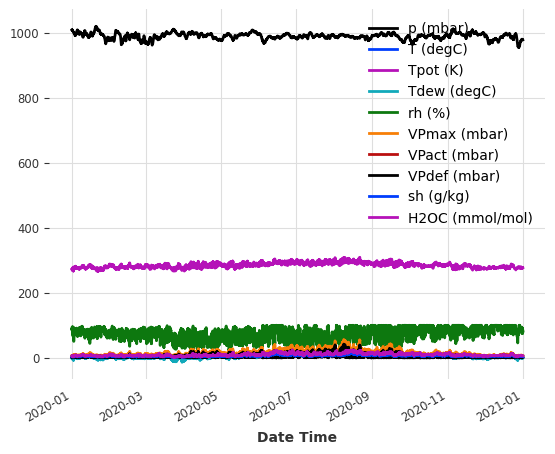

In [5]:
series = WeatherDataset().load()
series.plot()


In [10]:

target = series['p (mbar)'][:100].astype(np.float32)
past_cov = series['rain (mm)'][:100].astype(np.float32)
future_cov = series['T (degC)'][:106].astype(np.float32)

In [7]:
model = RandomForest(
    lags=12,
    output_chunk_length=12,
    n_estimators=1000,
    criterion="absolute_error",
)


model.fit(target)
pred = model.predict(24)
pred.values()

array([[1006.0548158 ],
       [1006.02769806],
       [1006.03021173],
       [1006.02395984],
       [1006.02170978],
       [1006.00124078],
       [1005.91777777],
       [1005.86422009],
       [1005.81138208],
       [1005.7482818 ],
       [1005.7260119 ],
       [1005.74818396],
       [1006.0548158 ],
       [1006.02769806],
       [1006.03021173],
       [1006.02395984],
       [1006.02170978],
       [1006.00124078],
       [1005.91777777],
       [1005.86422009],
       [1005.81138208],
       [1005.7482818 ],
       [1005.7260119 ],
       [1005.74818396]])

<Axes: xlabel='Date Time'>

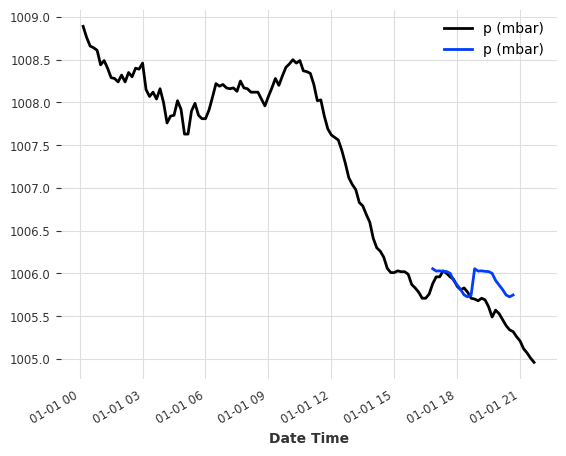

In [8]:
series['p (mbar)'][:130].plot()
pred.plot()

In [19]:
model = TFTModel(
    input_chunk_length=6,
    output_chunk_length=6,
    n_epochs=5,
)
model.fit(target, past_covariates=past_cov, future_covariates=future_cov)
pred = model.predict(6, num_samples=100)
pred.all_values().shape

ValueError: TFTModel requires future covariates. The model applies multi-head attention queries on future inputs. Consider specifying a future encoder with `add_encoders` or setting `add_relative_index` to `True` at model creation (read TFT model docs for more information). These will automatically generate `future_covariates` from indexes.


ValueError: TFTModel requires future covariates. The model applies multi-head attention queries on future inputs. Consider specifying a future encoder with `add_encoders` or setting `add_relative_index` to `True` at model creation (read TFT model docs for more information). These will automatically generate `future_covariates` from indexes.

<Axes: xlabel='Date Time'>

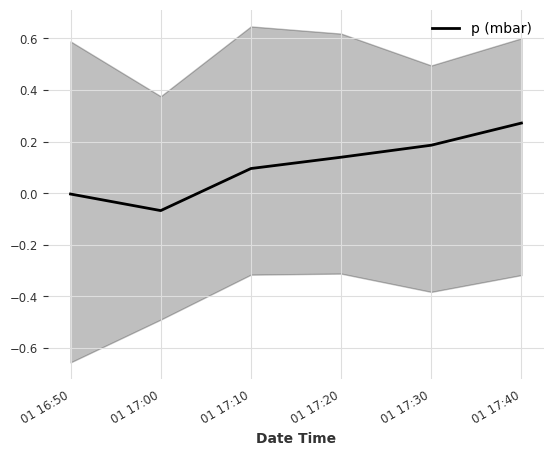

In [21]:
pred.plot()